In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('feature_engineering.csv')
data.head(5)

,user_id,first_order_time,first_order_price,age_month,city_num,platform_num,model_num,app_num,main_home,main_home2,...,finish_learn_ratio,daily_study_time,is_subscribe,platform_num_cnt,model_num_cnt,city_num_cnt,province_cnt,age_stage_cnt,first_order_price_stage_cnt,first_order_Q_cnt
0,2000001555945280,2018-12-23 11:44:00,0.0,32,广州,9.2969,11.2707,1,0.0,0.0,...,0.0,0.142857,0,101881,541,3061,11055,10731.0,107370,49795
1,2000001556645228,2019-01-11 09:46:00,0.0,127,徐州,9.2969,4.9689,1,17.0,13.0,...,0.0,0.750000,1,101881,290,708,4448,44210.0,107370,62283
2,2000001558047804,2018-12-26 11:04:00,0.0,92,error,9.2969,6.6392,1,5.0,13.0,...,0.0,3.000000,0,101881,539,27594,28284,44210.0,107370,49795
3,2000001558146467,2018-12-31 08:47:00,0.0,83,error,9.2969,12.2222,1,72.0,43.0,...,100.0,4.000000,0,101881,34,27594,28284,44210.0,107370,49795
4,2000001558146878,2019-01-28 01:53:00,0.0,47,error,13.5570,10.3925,1,36.0,28.0,...,0.0,9.750000,1,29238,1370,27594,28284,75048.0,107370,62283


In [2]:
df=data.copy()
import pyecharts.options as opts
from pyecharts.charts import Pie
x=df["age_year"]
bins=np.arange(0,60,2.5)
time_bins = pd.cut(x, bins)  # 对数据进行离散化处理
print(time_bins)
df1 = df.groupby(time_bins)["age_year"].count()
print(df1)

0           (2.5, 5.0]
1         (10.0, 12.5]
2          (7.5, 10.0]
3           (5.0, 7.5]
4           (2.5, 5.0]
              ...     
131114      (5.0, 7.5]
131115      (5.0, 7.5]
131116      (5.0, 7.5]
131117      (5.0, 7.5]
131118      (5.0, 7.5]
Name: age_year, Length: 131119, dtype: category
Categories (23, interval[float64, right]): [(0.0, 2.5] < (2.5, 5.0] < (5.0, 7.5] < (7.5, 10.0] ... (47.5, 50.0] < (50.0, 52.5] < (52.5, 55.0] < (55.0, 57.5]]
age_year
(0.0, 2.5]       5113
(2.5, 5.0]      51321
(5.0, 7.5]      58035
(7.5, 10.0]     11365
(10.0, 12.5]     1645
(12.5, 15.0]      303
(15.0, 17.5]      244
(17.5, 20.0]      140
(20.0, 22.5]      132
(22.5, 25.0]       20
(25.0, 27.5]       31
(27.5, 30.0]       14
(30.0, 32.5]       44
(32.5, 35.0]        2
(35.0, 37.5]        0
(37.5, 40.0]        4
(40.0, 42.5]        0
(42.5, 45.0]        0
(45.0, 47.5]        0
(47.5, 50.0]        1
(50.0, 52.5]        0
(52.5, 55.0]        0
(55.0, 57.5]        1
Name: age_year, dtype: int

In [3]:
def trans_age(x):
    if x['age_year']>=0 and x['age_year']<=6:
        return '婴幼儿'
    elif x['age_year']>6 and x['age_year']<=12:
        return '少儿'
    elif x['age_year']>12 and x['age_year']<=18:
        return '青少年'
    elif x['age_year']>18 and x['age_year']<=30:
        return '青年'
    elif x['age_year']>30 and x['age_year']<=50:
        return '中年'
    else:
        return '老年'
data.loc[:,'age_group']=data.apply(trans_age,axis=1)

data.head(5)



,user_id,first_order_time,first_order_price,age_month,city_num,platform_num,model_num,app_num,main_home,main_home2,...,daily_study_time,is_subscribe,platform_num_cnt,model_num_cnt,city_num_cnt,province_cnt,age_stage_cnt,first_order_price_stage_cnt,first_order_Q_cnt,age_group
0,2000001555945280,2018-12-23 11:44:00,0.0,32,广州,9.2969,11.2707,1,0.0,0.0,...,0.142857,0,101881,541,3061,11055,10731.0,107370,49795,婴幼儿
1,2000001556645228,2019-01-11 09:46:00,0.0,127,徐州,9.2969,4.9689,1,17.0,13.0,...,0.750000,1,101881,290,708,4448,44210.0,107370,62283,少儿
2,2000001558047804,2018-12-26 11:04:00,0.0,92,error,9.2969,6.6392,1,5.0,13.0,...,3.000000,0,101881,539,27594,28284,44210.0,107370,49795,少儿
3,2000001558146467,2018-12-31 08:47:00,0.0,83,error,9.2969,12.2222,1,72.0,43.0,...,4.000000,0,101881,34,27594,28284,44210.0,107370,49795,少儿
4,2000001558146878,2019-01-28 01:53:00,0.0,47,error,13.5570,10.3925,1,36.0,28.0,...,9.750000,1,29238,1370,27594,28284,75048.0,107370,62283,婴幼儿


In [4]:
data['age_group'].value_counts()

婴幼儿    85779
少儿     44210
青少年      766
青年       306
中年        51
老年         7
Name: age_group, dtype: int64

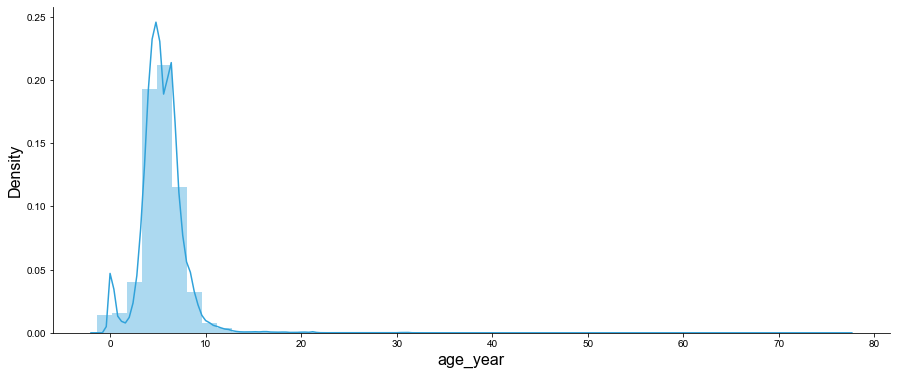

In [5]:
#观察年龄age是否呈正态分布
import seaborn as sns
import matplotlib.pyplot as plt

five_thirty_eight = [
    '#30a2da',
    '#fc4f30',
    '#e5ae38',
    '#6d904f',
    '#8b8b8b',
]

plt.figure(figsize = (15,6))
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

sns.set_palette(sns.color_palette(five_thirty_eight))

sns.distplot(data['age_year'])


sns.set(style='ticks')
sns.despine()

In [6]:
import pyecharts.options as opts
from pyecharts.charts import Pie


x_data = ["婴幼儿", "少儿", "青少年", "青年", "中年","老年"]
y_data = [85779, 44210, 776, 306, 51,7]
data_pair = [list(z) for z in zip(x_data, y_data)]
data_pair.sort(key=lambda x: x[1])

bar1=(
    Pie(init_opts=opts.InitOpts(width="1600px", height="800px"))
    .add(
        series_name="访问来源",
        data_pair=data_pair,
        rosetype="radius",
        radius="55%",
        center=["50%", "50%"],
        label_opts=opts.LabelOpts(is_show=False, position="center"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="用户年龄分组饼状图",
            pos_left="center",
            pos_top="20",
            title_textstyle_opts=opts.TextStyleOpts(color="#000000"),
        ),
        legend_opts=opts.LegendOpts(is_show=False),
    )
    .set_series_opts(
        tooltip_opts=opts.TooltipOpts(
            trigger="item", formatter="{a} <br/>{b}: {c} ({d}%)"
        ),
        label_opts=opts.LabelOpts(color="#000000",formatter="{b}:占比 {d}%")
    )
   
)
bar1.render_notebook()

In [7]:
#用户年龄组图
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker
x_data = ["婴幼儿", "少儿", "青少年", "青年", "中年","老年"]
y_data = [85779, 44210, 776, 306, 51,7]

c = (
    Pie()
    .add(
        "",
        [list(z) for z in zip(x_data, y_data)],
        radius=["40%", "55%"],
        label_opts=opts.LabelOpts(
            position="outside",
            formatter="{a|{a}}{abg|}\n{hr|}\n {b|{b}: }{c}  {per|{d}%}  ",
            background_color="#eee",
            border_color="#aaa",
            border_width=1,
            border_radius=4,
            rich={
                "a": {"color": "#000000", "lineHeight": 22, "align": "center"},
                "abg": {
                    "backgroundColor": "#e3e3e3",
                    "width": "100%",
                    "align": "right",
                    "height": 22,
                    "borderRadius": [4, 4, 0, 0],
                },
                "hr": {
                    "borderColor": "#aaa",
                    "width": "100%",
                    "borderWidth": 0.5,
                    "height": 0,
                },
                "b": {"fontSize": 16, "lineHeight": 33},
                "per": {
                    "color": "#eee",
                    "backgroundColor": "#334455",
                    "padding": [2, 4],
                    "borderRadius": 2,
                },
            },
        ),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="用户年龄分组饼状图"))
)
c.render_notebook()

In [8]:
import numpy as np
import scipy
from scipy import stats
age_average = np.mean(data['age_year'])
print("平均数：",age_average)
age_median=np.median(data['age_year'])
print("中位数：",age_median)
#众数
zd={}
for i in data['age_year']:
    zd[i]=0
for j in data['age_year']:
    if j in zd.keys():
        zd[j]+=1
maxkey=0
maxvalue=0
for key in zd.keys():
    if zd[key]>maxvalue:
        maxkey=key
        maxvalue=zd[key]      
print("众数：",maxkey)

#方差
def avg(sz):
    av=0
    for i in sz:
        av=av+i
    return av/len(sz)

av=avg(data['age_year'])
sp1=[]
for i in data['age_year']:
    sp1.append((i-av)**2)
ss=avg(sp1)
print("方差：",ss)

age_75per= np.percentile(data['age_year'], 75)
print("75百分位",age_75per)

平均数： 5.37757914566114
中位数： 5.2
众数： 4.8
方差： 5.100058169849054
75百分位 6.5


In [9]:

#统计人数
data['first_order_week'].value_counts()

7    23074
6    22689
1    22268
5    20036
2    19294
3    12564
4    11194
Name: first_order_week, dtype: int64

In [10]:
#用户下单人数与星期几的关系
from pyecharts import options as opts
from pyecharts.charts import Bar
l1=['星期一','星期二','星期三','星期四','星期五','星期六','星期日']
l2=[11194,12564,19294,20036,22268,22689,23074]
bar = (
    Bar()
    .add_xaxis(l1)
    .add_yaxis("日期", l2)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="下单人数和星期的关系"),
        yaxis_opts=opts.AxisOpts(name="下单人数"),
        xaxis_opts=opts.AxisOpts(name="星期"),)
)
bar.render_notebook()

In [11]:
data.first_order_Q.value_counts()

1    62283
4    49795
2    19041
Name: first_order_Q, dtype: int64

In [12]:
#首次下单季度和购买人数的关系图
from pyecharts import options as opts
from pyecharts.charts import Bar
l1=["第一季度", "第二季度", "第三季度", "第四季度"]
l2=[62283, 19041, 0, 49795]
bar2 = (
    Bar()
    .add_xaxis(l1)
    .add_yaxis("日期", l2)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="下单人数和季度的关系"),
        yaxis_opts=opts.AxisOpts(name="下单人数"),
        xaxis_opts=opts.AxisOpts(name="星期"),)
)
bar2.render_notebook()

In [13]:
#下单时间与购买人数的关系
df=data.copy()
df['first_order_time'] = df['first_order_time'].str.slice(0,7)#按照年-月分组
df = df.reset_index()
df['first_order_time'].value_counts()


2018-12    34043
2019-01    28477
2019-03    22907
2018-11    15752
2019-04    14908
2019-02    10899
2019-05     4133
Name: first_order_time, dtype: int64

In [14]:
# 按照月份进行汇总
data['first_order_time'] = data['first_order_time'].str.slice(0,7) # 保留到月
data_month = data.groupby(data['first_order_time']).sum()
data_month.reset_index(inplace = True) # 使index作为列
data_month = data_month.loc[:, ['first_order_time', 'app_num', 'result']]
data_month['result'] = data_month['result'].astype(int)
data_month['CVR'] = data_month['result']/data_month['app_num']
data_month

,first_order_time,app_num,result,CVR
0,2018-11,15752.0,742,0.047105
1,2018-12,34043.0,1311,0.038510
2,2019-01,28477.0,925,0.032482
3,2019-02,10899.0,501,0.045968
4,2019-03,22907.0,606,0.026455
5,2019-04,14908.0,304,0.020392
6,2019-05,4133.0,81,0.019598


In [15]:
import pyecharts.options as opts
from pyecharts.charts import Line, Grid
from pyecharts.commons.utils import JsCode


x_data = ["2018-11", "2018-12", "2019-01", "2019-02", "2019-03", "2019-04", "2019-05"]
y_data = [15752, 34043, 28477, 10899, 22907, 14908, 4133]

background_color_js = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color: '#c86589'}, {offset: 1, color: '#06a7ff'}], false)"
)
area_color_js = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color: '#eb64fb'}, {offset: 1, color: '#3fbbff0d'}], false)"
)

c = (
    Line(init_opts=opts.InitOpts(bg_color=JsCode(background_color_js)))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="注册总量",
        y_axis=y_data,
        is_smooth=True,
        is_symbol_show=True,
        symbol="circle",
        symbol_size=6,
        linestyle_opts=opts.LineStyleOpts(color="#fff"),
        label_opts=opts.LabelOpts(is_show=True, position="top", color="white"),
        itemstyle_opts=opts.ItemStyleOpts(
            color="red", border_color="#fff", border_width=3
        ),
        tooltip_opts=opts.TooltipOpts(is_show=False),
        areastyle_opts=opts.AreaStyleOpts(color=JsCode(area_color_js), opacity=1),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="用户下单时间与人数对应关系",
            pos_bottom="5%",
            pos_left="center",
            title_textstyle_opts=opts.TextStyleOpts(color="#fff", font_size=16),
        ),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            boundary_gap=False,
            axislabel_opts=opts.LabelOpts(margin=30, color="#ffffff63"),
            axisline_opts=opts.AxisLineOpts(is_show=False),
            axistick_opts=opts.AxisTickOpts(
                is_show=True,
                length=25,
                linestyle_opts=opts.LineStyleOpts(color="#ffffff1f"),
            ),
            splitline_opts=opts.SplitLineOpts(
                is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")
            ),
        ),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            position="right",
            axislabel_opts=opts.LabelOpts(margin=20, color="#ffffff63"),
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(width=2, color="#fff")
            ),
            axistick_opts=opts.AxisTickOpts(
                is_show=True,
                length=15,
                linestyle_opts=opts.LineStyleOpts(color="#ffffff1f"),
            ),
            splitline_opts=opts.SplitLineOpts(
                is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")
            ),
        ),
        legend_opts=opts.LegendOpts(is_show=False),
    )
)

(
    Grid()
    .add(
        c,
        grid_opts=opts.GridOpts(
            pos_top="20%",
            pos_left="10%",
            pos_right="10%",
            pos_bottom="15%",
            is_contain_label=True,
        ),
    )

)
c.render_notebook()

In [16]:
# 用户转化率
# 查看是否有未激活app的用户
data[data['app_num'] != 1].iloc[:,0].size

0

In [17]:
#用户量-时间图
import pyecharts.options as opts
from pyecharts.charts import Line
from pyecharts.faker import Faker
x_data = ["2018-11", "2018-12", "2019-01", "2019-02", "2019-03", "2019-04", "2019-05"]
y_data1=[15752, 34043, 28477, 10899, 22907, 14908, 4133]
y_data2=data_month['CVR'] 

c = (
    Line()
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis("用户数量", y_axis=y_data1)
   
    .set_global_opts(title_opts=opts.TitleOpts(title="时间-用户数关系图"))
    
)
c.render_notebook()

In [18]:
data_month['CVR']

0    0.047105
1    0.038510
2    0.032482
3    0.045968
4    0.026455
5    0.020392
6    0.019598
Name: CVR, dtype: float64

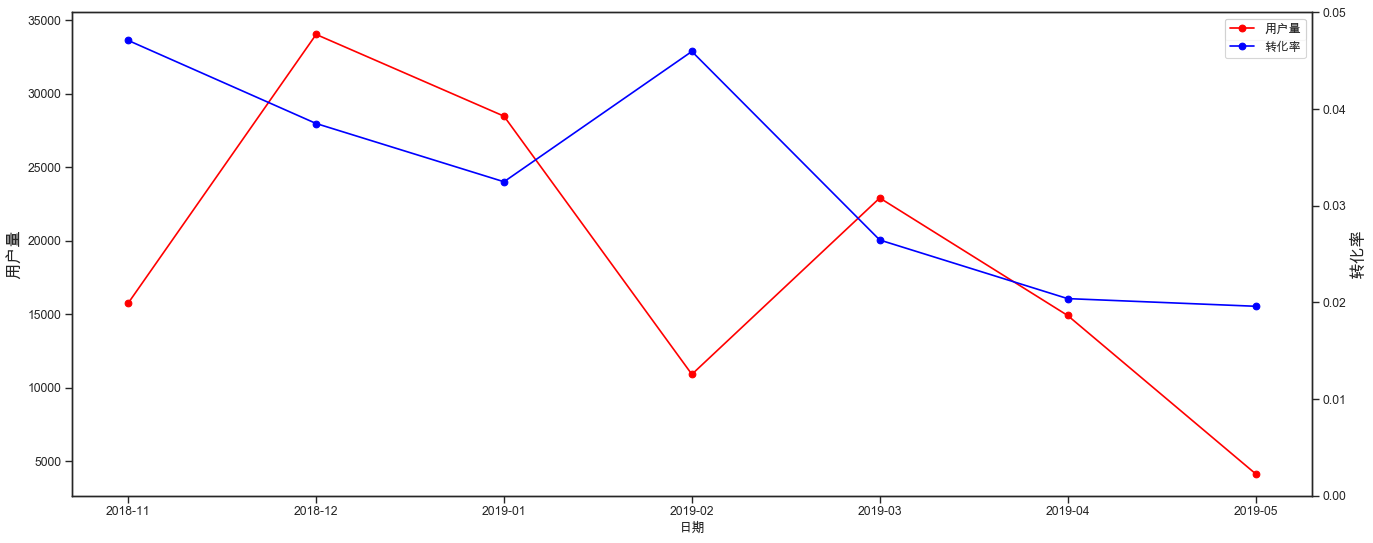

In [19]:
#用户量-时间-转化率关系
%matplotlib inline
import pandas as pd

from matplotlib import pyplot as plt
x_data = ["2018-11", "2018-12", "2019-01", "2019-02", "2019-03", "2019-04", "2019-05"]
y_data1=[15752, 34043, 28477, 10899, 22907, 14908, 4133]
y_data2=data_month['CVR'] 

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']   
fig = plt.figure(figsize=(20,8),dpi=80)
ax = fig.add_subplot(111)
lin1 = ax.plot(x_data,y_data1,label='用户量',color='red', marker='o')
ax.legend()
ax.set_ylabel("用户量",fontsize=15)
ax.set_xlabel("日期")

ax2=ax.twinx()
ax2.set_ylim(0, 0.05)
# ax2.set_yticks([0.01, 0.02, 0.03, 0.04, 0.05])
lin2=ax2.plot(x_data,y_data2,label='转化率',color='blue', marker='o')

ax2.legend()
ax2.set_ylabel("转化率",fontsize=15)
#合并图列
lns = lin1+lin2
labs = [l.get_label() for l in lns]
ax2.legend(lns,labs)
plt.show()

In [20]:
# 用户转化率
# 查看是否有未激活app的用户
data[data['app_num'] != 1].iloc[:,0].size

0

In [21]:
# 按照月份进行汇总
data['first_order_time'] = data['first_order_time'].str.slice(0,7) # 保留到月
data_month = data.groupby(data['first_order_time']).sum()
data_month.reset_index(inplace = True) # 使index作为列
data_month = data_month.loc[:, ['first_order_time', 'app_num', 'result']]
data_month['result'] = data_month['result'].astype(int)
data_month['CVR'] = data_month['result']/data_month['app_num']
data_month

,first_order_time,app_num,result,CVR
0,2018-11,15752.0,742,0.047105
1,2018-12,34043.0,1311,0.038510
2,2019-01,28477.0,925,0.032482
3,2019-02,10899.0,501,0.045968
4,2019-03,22907.0,606,0.026455
5,2019-04,14908.0,304,0.020392
6,2019-05,4133.0,81,0.019598


In [22]:
# 统计各个省的用户数量
province = data['省'].agg(['value_counts'])
province.reset_index(inplace = True) # 使index作为列
province = province[province['index'] != 'error']
province.rename(columns={'index':'省', 'value_counts': '用户数'}, inplace = True) # 更换列名
province

,省,用户数
1,重庆,12078
2,广东,11055
3,河北,8044
4,河南,7933
5,山西,7009
6,山东,6992
7,四川,5601
8,福建,4496
9,江苏,4448
10,湖南,3744


In [23]:
from pyecharts import options as opts
from pyecharts.charts import Map

c1 = (
        Map()
        .add(
            series_name = "用户数",
            data_pair = province.values,
            maptype = "china",
            is_map_symbol_show = False,                    # 此处控制在地图上是否显示红点，data_pair中有的市名才会在地图中显示红点
            label_opts=opts.LabelOpts(is_show=True),    # 此处控制在地图上是否显示名称
            )
        # 设置全局项
        .set_global_opts(
            title_opts=opts.TitleOpts(title="全国用户数分布图", pos_left="center"),   # 设置标题居中
            legend_opts=opts.LegendOpts(  # 设置图例配置项
                is_show=False
            ),
            visualmap_opts=opts.VisualMapOpts(# 通过视觉主件的颜色来展示数据大小
                pieces=[
                    {"max": 12100, "min": 9680, "label": "9680-12100", "color": "#073067"},
                    {"max": 9680.99, "min": 7260, "label": "7260-9680", "color": "#125CA3"},
                    {"max": 7259.99, "min": 4840, "label": "4840-7260", "color": "#5AA1CF"},
                    {"max": 4839.99, "min": 2420, "label": "2420-4840", "color": "#BFD7EF"},
                    {"max": 2419.99, "min": 0, "label": "0-2420", "color": "#E5EDF8"},
                ],
                is_piecewise=True    # 分段型
            )
        )
    )
c1.render_notebook()

In [24]:
# 定义一个函数，返回某个省份的用户数据
def CountByCity(city):
    data_city = data['市'][data['省'] == city].agg(['value_counts'])
    data_city.reset_index(inplace = True) # 使index作为列
    data_city.rename(columns={'index':'市', 'value_counts': '用户数'}, inplace = True) # 更换列名
    data_city.iloc[:,0] = data_city.iloc[:,0] + '市'
    return data_city
# 广东省用户数按照市汇总
gd = CountByCity( '广东')
gd

,市,用户数
0,广州市,3061
1,深圳市,1806
2,东莞市,1443
3,佛山市,1058
4,中山市,626
5,惠州市,552
6,汕头市,271
7,湛江市,261
8,梅州市,237
9,肇庆市,231


In [25]:
# 广东省用户数分布图
from pyecharts import options as opts
from pyecharts.charts import Map

c2 = (
        Map()
        .add(
            series_name = "用户数",
            data_pair = gd.values,
            maptype = "广东",
            is_map_symbol_show = False,                    # 此处控制在地图上是否显示红点，data_pair中有的市名才会在地图中显示红点
            label_opts=opts.LabelOpts(is_show=True),    # 此处控制在地图上是否显示名称
            )
        # 设置全局项
        .set_global_opts(
            title_opts=opts.TitleOpts(title="广东省用户数分布图", pos_left="center"),   # 设置标题居中
            legend_opts=opts.LegendOpts(  # 设置图例配置项
                is_show=False
            ),
            visualmap_opts=opts.VisualMapOpts(# 通过视觉主件的颜色来展示数据大小
                pieces=[
                    {"max": 3100, "min": 2480, "label": "2480-3100", "color": "#125CA3"},
                    {"max": 2479.99, "min": 1860, "label": "1860-2480", "color": "#2876B6"},
                    {"max": 1859.99, "min": 1240, "label": "1240-1860", "color": "#5AA1CF"},
                    {"max": 1239.99, "min": 620, "label": "620-1240", "color": "#BFD7EF"},
                    {"max": 619.99, "min": 0, "label": "0-620", "color": "#E5EDF8"},
                ],
                is_piecewise=True    # 分段型
            )
        )
    )
c2.render_notebook()

In [26]:
# 河南省用户数按照市汇总
hn = CountByCity('河南')
# 河南省用户数分布图
from pyecharts import options as opts
from pyecharts.charts import Map

c3 = (
        Map()
        .add(
            series_name = "用户数",
            data_pair = hn.values,
            maptype = "河南",
            is_map_symbol_show = False,                    # 此处控制在地图上是否显示红点，data_pair中有的市名才会在地图中显示红点
            label_opts = opts.LabelOpts(is_show=True),    # 此处控制在地图上是否显示名称
            )
        # 设置全局项
        .set_global_opts(
            title_opts=opts.TitleOpts(title="河南省用户数分布图", pos_left="center"),   # 设置标题居中
            legend_opts=opts.LegendOpts(  # 设置图例配置项
                is_show=False
            ),
            visualmap_opts=opts.VisualMapOpts(# 通过视觉主件的颜色来展示数据大小
                pieces=[
                    {"max": 2500, "min": 2000, "label": "2000-2500", "color": "#073067"},
                    {"max": 1999.99, "min": 1500, "label": "1500-2500", "color": "#125CA3"},
                    {"max": 1499.99, "min": 1000, "label": "1000-1500", "color": "#5AA1CF"},
                    {"max": 999.99, "min": 500, "label": "500-1000", "color": "#BFD7EF"},
                    {"max": 499.99, "min": 0, "label": "0-500", "color": "#E5EDF8"},
                ],
                is_piecewise=True    # 分段型
            )
        )
    )
c3.render_notebook()

In [27]:
# 河北省用户数按照市汇总
hb = CountByCity('河北')
# 河北省用户数分布图
from pyecharts import options as opts
from pyecharts.charts import Map

c4 = (
        Map()
        .add(
            series_name = "用户数",
            data_pair = hb.values,
            maptype = "河北",
            is_map_symbol_show = False,                    # 此处控制在地图上是否显示红点，data_pair中有的市名才会在地图中显示红点
            label_opts = opts.LabelOpts(is_show=True),    # 此处控制在地图上是否显示名称
            )
        # 设置全局项
        .set_global_opts(
            title_opts=opts.TitleOpts(title="河北省用户数分布图", pos_left="center"),   # 设置标题居中
            legend_opts=opts.LegendOpts(  # 设置图例配置项
                is_show=False
            ),
            visualmap_opts=opts.VisualMapOpts(# 通过视觉主件的颜色来展示数据大小
                pieces=[
                    {"max": 2100, "min": 1680, "label": "2000-2500", "color": "#073067"},
                    {"max": 1679.99, "min": 1260, "label": "1500-2500", "color": "#125CA3"},
                    {"max": 1259.99, "min": 840, "label": "1000-1500", "color": "#5AA1CF"},
                    {"max": 839.99, "min": 420, "label": "500-1000", "color": "#BFD7EF"},
                    {"max": 419.99, "min": 0, "label": "0-500", "color": "#E5EDF8"},
                ],
                is_piecewise=True    # 分段型
            )
        )
    )
c4.render_notebook()

In [28]:
province_CVR = data.loc[:, ['省', 'province_CVR']]
province_CVR.drop_duplicates(keep='first', inplace = True) # 去除重复值
province_CVR = province_CVR[province_CVR['省'] != 'error']
province_CVR = province_CVR[province_CVR['province_CVR'] > 0]
province_CVR = province_CVR.sort_values(by = 'province_CVR', ascending = False) # 降序排列
province_CVR_top5 = province_CVR.iloc[0:5, :]
province_CVR_top5 = province_CVR_top5.reset_index(drop = True)
province_CVR_top5['市'] = ''
province_CVR_top5

,省,province_CVR,市
0,北京,0.078597,
1,上海,0.074051,
2,海南,0.061333,
3,浙江,0.057418,
4,广东,0.054274,


In [29]:
province_CVR

,省,province_CVR
31,北京,0.078597
69,上海,0.074051
436,海南,0.061333
14,浙江,0.057418
0,广东,0.054274
59,广西,0.051421
16,天津,0.050998
1,江苏,0.050809
590,贵州,0.045857
67,云南,0.041162


In [30]:
# 各省份用户转化率
from pyecharts.charts import Bar
from pyecharts.globals import ThemeType

c5 = (
    Bar()
    .add_xaxis(province_CVR['省'].tolist())
    .add_yaxis('', province_CVR['province_CVR'].tolist(), category_gap = 8, color='#5AA1CF')
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各省份用户转化率"),
        datazoom_opts = opts.DataZoomOpts(orient="vertical"), # 区域缩放
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-60)) # x轴标签旋转    
    )
    .set_series_opts(
        label_opts = opts.LabelOpts(is_show=False) # 不显示数据标签
    )
    
)
c5.render_notebook()

In [31]:
# 定义一个函数，输入省份，即可按照市进行汇总（用户数，购买数，用户转化率 = 用户数/购买数）
def CountByCity2(province):
    data_city2 = data[data['省'] == province].groupby(data['市']).sum()
    data_city2.reset_index(inplace = True) # 使index作为列
    data_city2 = data_city2.loc[:, ['市', 'app_num', 'result']]
    data_city2['result'] = data_city2['result'].astype(int)
    data_city2['CVR'] = data_city2['result']/data_city2['app_num']
    data_city2 = data_city2.sort_values(by = 'CVR', ascending = False) # 降序排列
    data_city2 = data_city2[data_city2['CVR'] != 0].loc[:, ['市', 'CVR']]
    return data_city2
CountByCity2('海南')

,市,CVR
13,澄迈县,0.153846
0,万宁,0.076923
12,海口,0.067073
10,文昌,0.062500
1,三亚,0.056338
15,琼海,0.045455
17,陵水黎族自治县,0.040000
